In [103]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random as rd


In [104]:
 genes=['gene' + str(i) for i in range(1,101)]
wt=['wt' + str(i) for i in range(1,6)]
ko=['ko' + str(i) for i in range(1,6)]

data=pd.DataFrame(columns=[*wt,*ko], index=genes)
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
print(data.head())
data.shape

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1   67   55   55   83   74  524  527  551  565  550
gene2  620  641  632  659  679  820  776  791  842  828
gene3   23   34   26   22   29  483  526  482  484  495
gene4  534  574  524  587  591  619  583  634  625  604
gene5  357  313  304  339  320  831  891  873  850  877


(100, 10)

In [105]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
data_scaled=pd.DataFrame(scaled_data,index=data.index, columns=data.columns)
print(data_scaled.head())

            wt1       wt2       wt3       wt4       wt5       ko1       ko2  \
gene1 -1.418092 -1.446430 -1.437949 -1.361492 -1.401950 -0.033032 -0.031154   
gene2  0.419615  0.463199  0.436267  0.535553  0.593720  1.021711  0.840464   
gene3 -1.564311 -1.514864 -1.532147 -1.562394 -1.550388 -0.179128 -0.034655   
gene4  0.133824  0.244863  0.085460  0.298422  0.303441  0.305484  0.164872   
gene5 -0.454376 -0.605672 -0.629145 -0.518361 -0.590487  1.060908  1.243019   

            ko3       ko4       ko5  
gene1  0.058865  0.091777  0.041770  
gene2  0.899286  1.042848  1.002233  
gene3 -0.182757 -0.186335 -0.148250  
gene4  0.349510  0.297785  0.228335  
gene5  1.186430  1.070316  1.171523  


In [106]:
pca=PCA()
pca.fit(data_scaled)
pca_data=pca.transform(data_scaled)

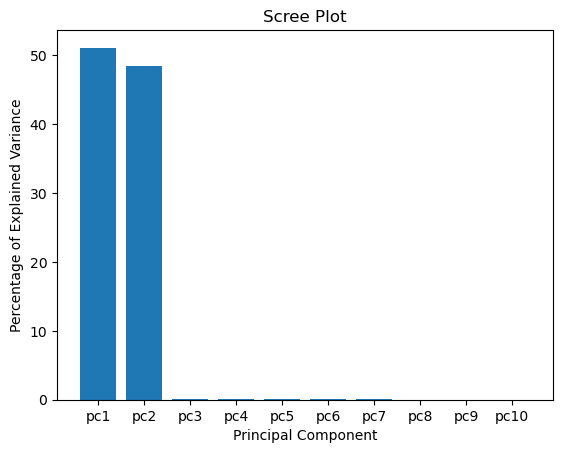

In [107]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['pc'+str(i) for i in range(1,len(per_var)+1)]


plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance') 
plt.xlabel('Principal Component') 
plt.title('Scree Plot') 
plt.show() 



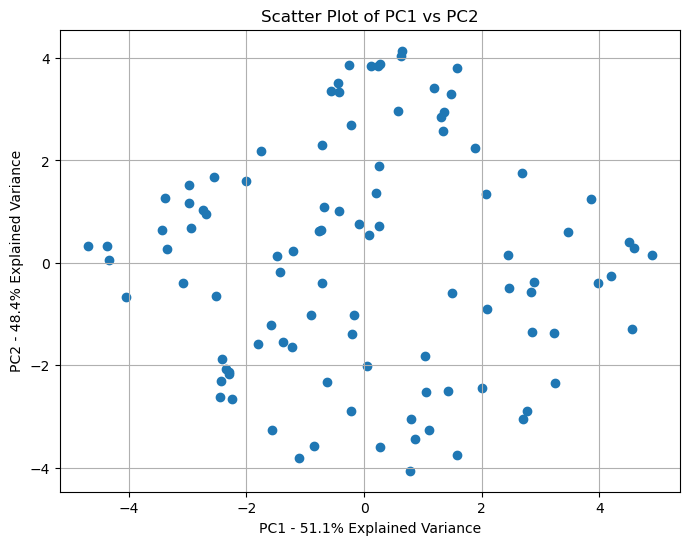

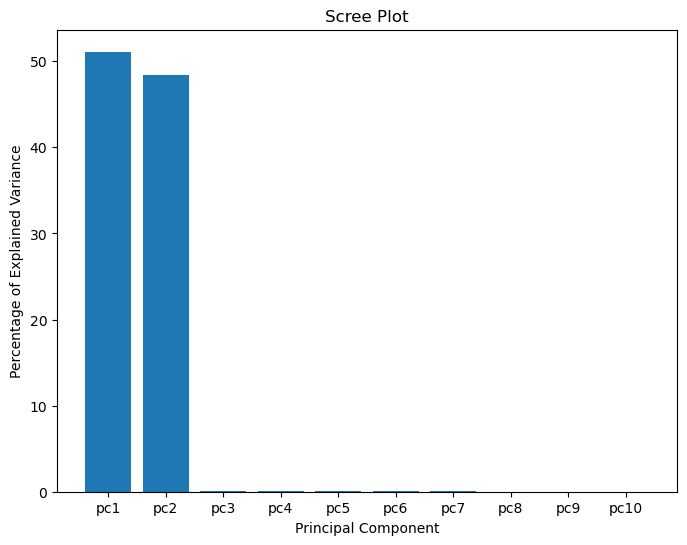

In [119]:


# Assume pca_data and per_var are already defined
labels = ['pc' + str(i) for i in range(1, len(per_var) + 1)]
index_labels = ['sample_' + str(i) for i in range(pca_data.shape[0])]

# Create DataFrame
pca_df = pd.DataFrame(pca_data, index=index_labels, columns=labels)

# Scatter plot of first two PCs
plt.figure(figsize=(8, 6))
plt.scatter(pca_df.pc1, pca_df.pc2)
plt.xlabel(f'PC1 - {per_var[0]}% Explained Variance')
plt.ylabel(f'PC2 - {per_var[1]}% Explained Variance')
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True)
plt.show()

# Scree plot
plt.figure(figsize=(8, 6))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
